<a href="https://colab.research.google.com/github/DeeS17/supervised_unsupervised_learning/blob/main/sprint_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content

- Stage 1: Data Pre-Processing
- Stage 2: Load Data
- Stage 3: Exploratory Data Analysis
  - Mean and Standard Deviation of Features
  - Mean of Features Based by Churn
  - Distribution of Features Based by Churn
  - Correlation Matrix of Dataset
- Build a Model to Predict Churn of Gym Member
- Cluster of Gym Member
  - Hierachical Clustering for Gym Member
  - Mean of Every Feature and Churn in Each Cluster
  - Distribution of Features Based by Cluster
  - Distribution of Features Based by Clusters
  - Churn Level in Clusters
- Conclusion and Recommendations

# Introduction

A fitness center franchise called Model Fitness is developing a customer engagement strategy based on analytical data. One of the most common problems encountered by fitness center services and even other services is customer turnover or customer churn.

# Objective

- Learn how to predict the churn probability (for the next month) for each customer.

- Make user segmentation by selecting the most dominant group, and describing the main characters.

- Analyze the factors that most influence churn.

- Draw basic conclusions and provide recommendations on how to improve customer service.

Stages:
- Data Pre-Processing
- Load Data
- Exploratory Data Analysis
- Build a Model to Predict Churn of Gym Member
- Cluster of Gym Member
- Conclusion and Recommendations

# Data Pre-Processing

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [ ]:
try:
  df = pd.read_csv('/datasets/gym_churn_us.csv')
except:
  df = pd.read_csv('/content/gym_churn_us.csv')

df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [ ]:
df.shape

(4000, 14)

The dataset consists of 4,000 rows and 14 columns. Next, I will check if there is any missing data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

All rows of each column have been filled in, which means that is no missing data.

In [ ]:
df.duplicated().sum()

0

There is no duplicate value, so I will continue to the next step.

# Exploratory Data Analysis

## Mean and Standard Deviation of Features

In [ ]:
df.describe().T.loc['gender':'Avg_class_frequency_current_month', ['mean', 'std']]

,mean,std
gender,0.510250,0.499957
Near_Location,0.845250,0.361711
Partner,0.486750,0.499887
Promo_friends,0.308500,0.461932
Phone,0.903500,0.295313
Contract_period,4.681250,4.549706
Group_visits,0.412250,0.492301
Age,29.184250,3.258367
Avg_additional_charges_total,146.943728,96.355602
Month_to_end_contract,4.322750,4.191297


The average value of the gender feature, Near_Location, Partner, Promo_friends, Phone, and Group_visits is below 1 because the value is binary, only 1 & 0. In addition, the Partner, Promo_friends, Group_visit, and Lifetime feature has a relatively large standard deviation value. It is because the standard deviation value is greater than the average value.

## Mean of Features Based by Churn 

In [ ]:
feature_mean_by_churn = df.groupby('Churn').agg({
    'gender':'mean',
    'Near_Location':'mean',
    'Partner':'mean',
    'Promo_friends':'mean',
    'Phone':'mean',
    'Contract_period': 'mean',
    'Group_visits' : 'mean',
    'Age' : 'mean',
    'Avg_additional_charges_total' : 'mean',
    'Month_to_end_contract' : 'mean',
    'Lifetime' : 'mean',
    'Avg_class_frequency_total' : 'mean',
    'Avg_class_frequency_current_month' : 'mean'
    }).T

feature_mean_by_churn.columns = ['stay', 'churn']
feature_mean_by_churn

,stay,churn
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


In the `stay` sample group, the average values of `Contract_period`, `Group_visits`, `Month_to_end_contract`, `Lifetime`, and `Avg_class_frequency_current_month` are higher than those in the `churn` sample group.

## Distribution of Features Based by Churn

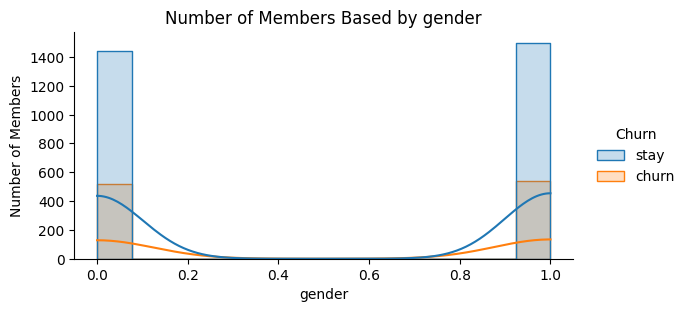

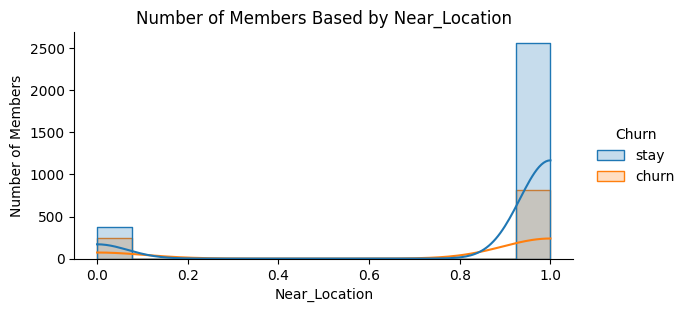

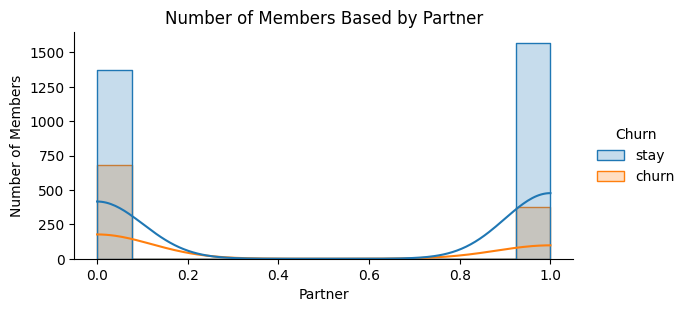

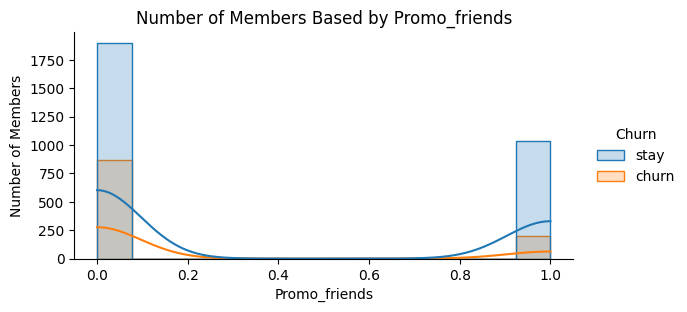

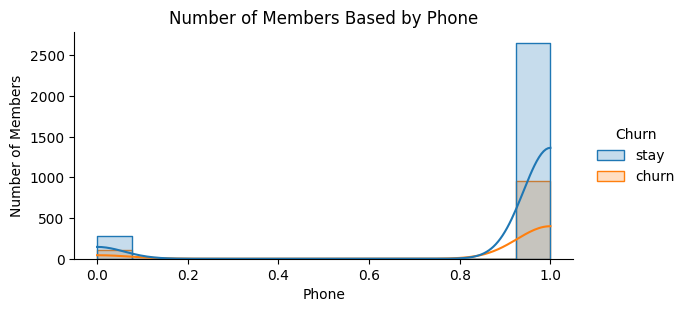

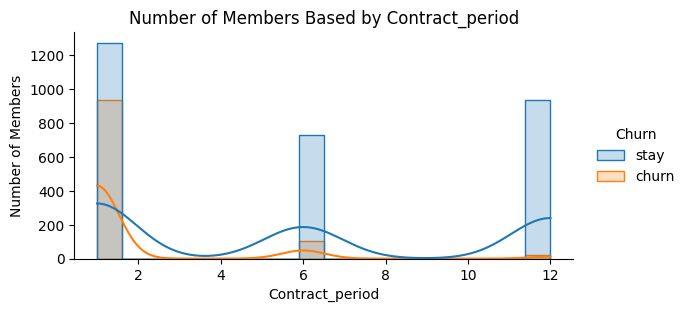

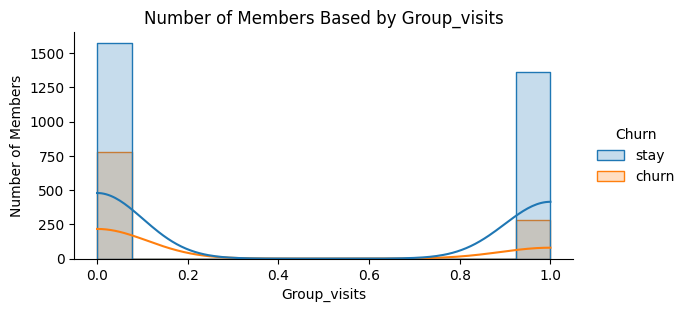

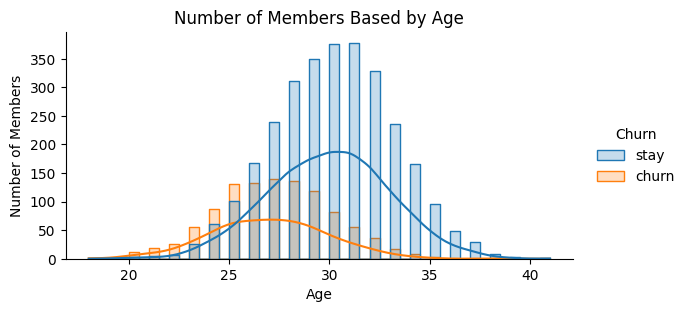

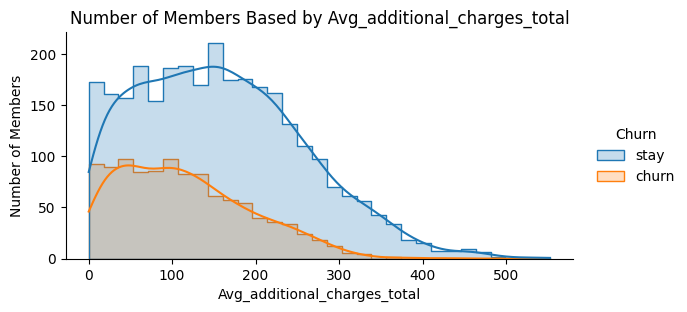

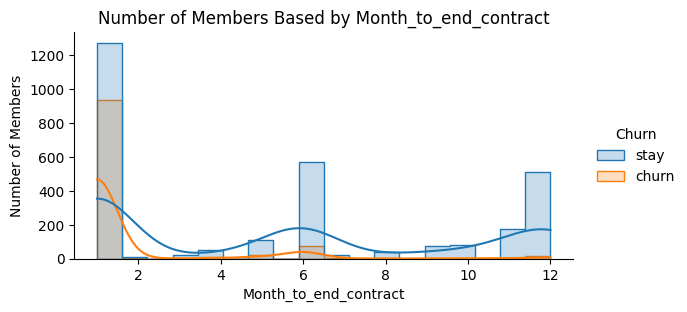

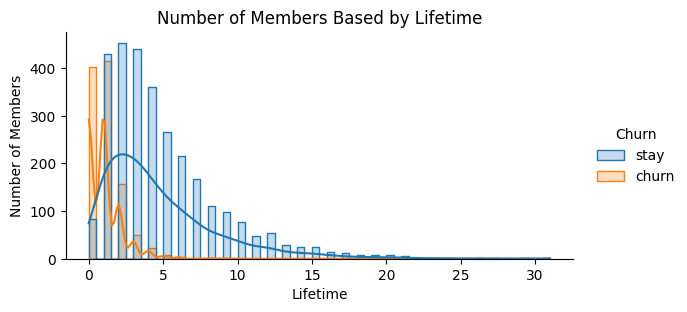

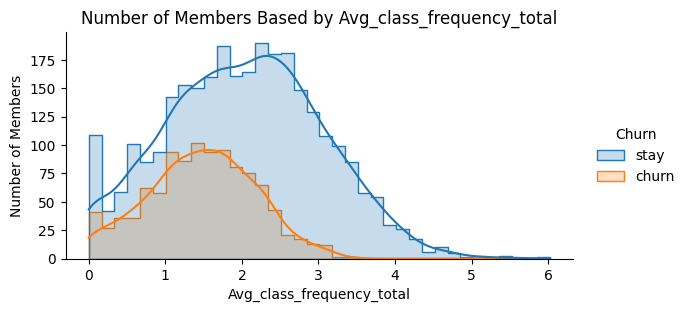

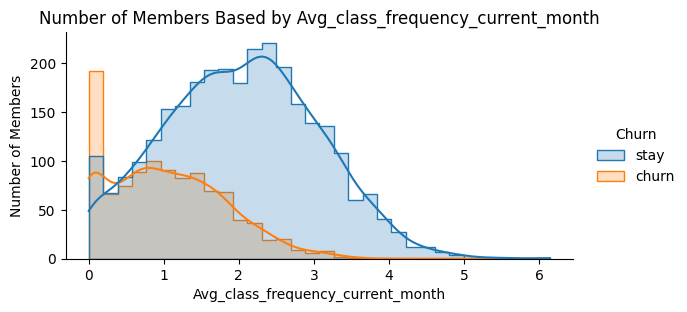

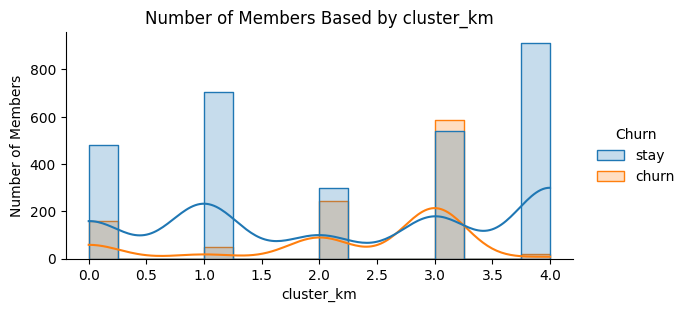

In [ ]:
df_ = df.copy()
df_.loc[df_['Churn'] == 0, 'Churn'] = 'stay'
df_.loc[df_['Churn'] == 1, 'Churn'] = 'churn'

for col in df_.columns.drop('Churn'):
  sns.displot(df_, x=col, hue='Churn', element='step', kde=True, height=3, aspect=2)
  plt.title('Number of Members Based by '+col, size=12)
  plt.xlabel(col, size=10)
  plt.ylabel('Number of Members', size=10)
  plt.show()

The number of members with values close to 0 in the `lifetime` and `Avg_class_frequency_current_month` features is greater in the `churn` sample group than in the `stay` sample group.

## Correlation Matrix Of Dataset

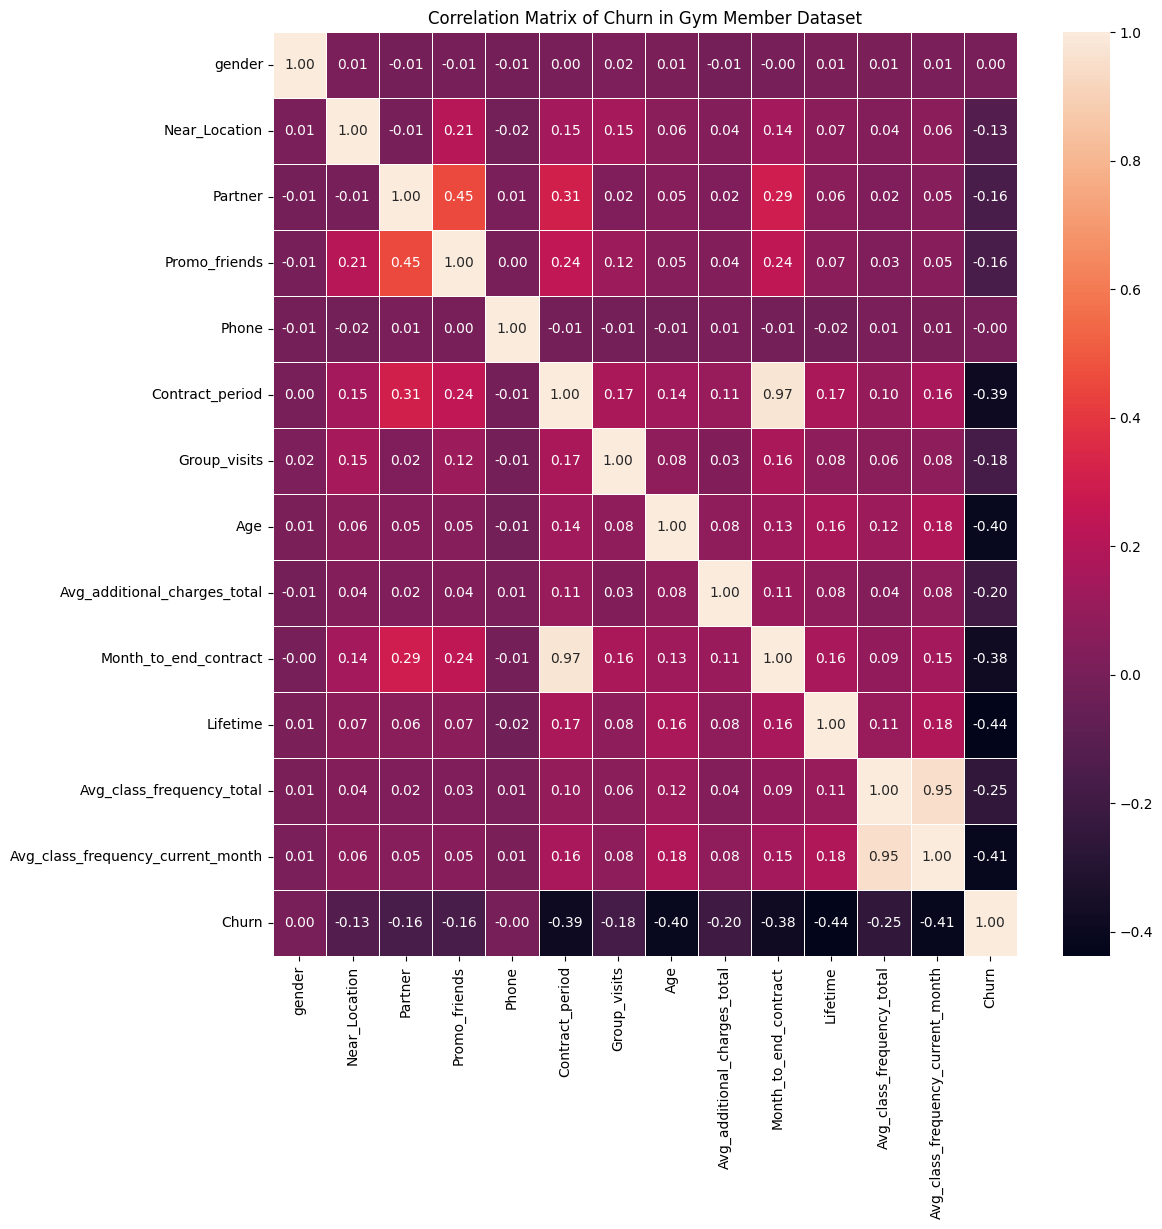

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), linewidth=.5, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Churn in Gym Member Dataset', size=12)
plt.show()

Of all the features, none are positively correlated with `Churn`. The `Lifetime` feature has the most negative correlation among the other features.

In addition, `Contract_period` with `Month_to_end_contract` and `Avg_class_frequency_current_month` with `Avg_class_frequency_total` are features that have a very strong positive correlation.

# Build a Model to Predict Churn of Gym Member

In [ ]:
# Divide data into features (X) and target variable (y)
X = df.drop('Churn', axis = 1)
y = df['Churn']

# Devide data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply standardization to the feature matrix for the test set
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

# define the algorithm for the logistic regression & random forest model 
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
lr_model = LogisticRegression(random_state=0)

# train the logistic regression & random forest model
lr_model.fit(X_train_st, y_train)
rf_model.fit(X_train_st, y_train)

# use trained models to make predictions
lr_predictions = lr_model.predict(X_test_st)
rf_predictions = rf_model.predict(X_test_st)

In [ ]:
# define a function that will generate the classification metrics
def print_all_metrics(y_true, y_pred, title = 'Metrik klasifikasi'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print()

# show all metrics
print_all_metrics(y_test, lr_predictions, title='Logistic Regression:')
print_all_metrics(y_test, rf_predictions, title='Random Forest:')

Logistic Regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83

Random Forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81



Both models have the same `Accuracy` value. However, the `Precision` and `Recall` values in the `Logistic Regression` model are slightly higher than those in the `Random Forest` model. This means that the proportion of `True Positive` in the `Random Forest` model is lower than that in the `Logistic Regression` model.

# Cluster of Gym Member

## Hierarchical Clustering for Gym Members

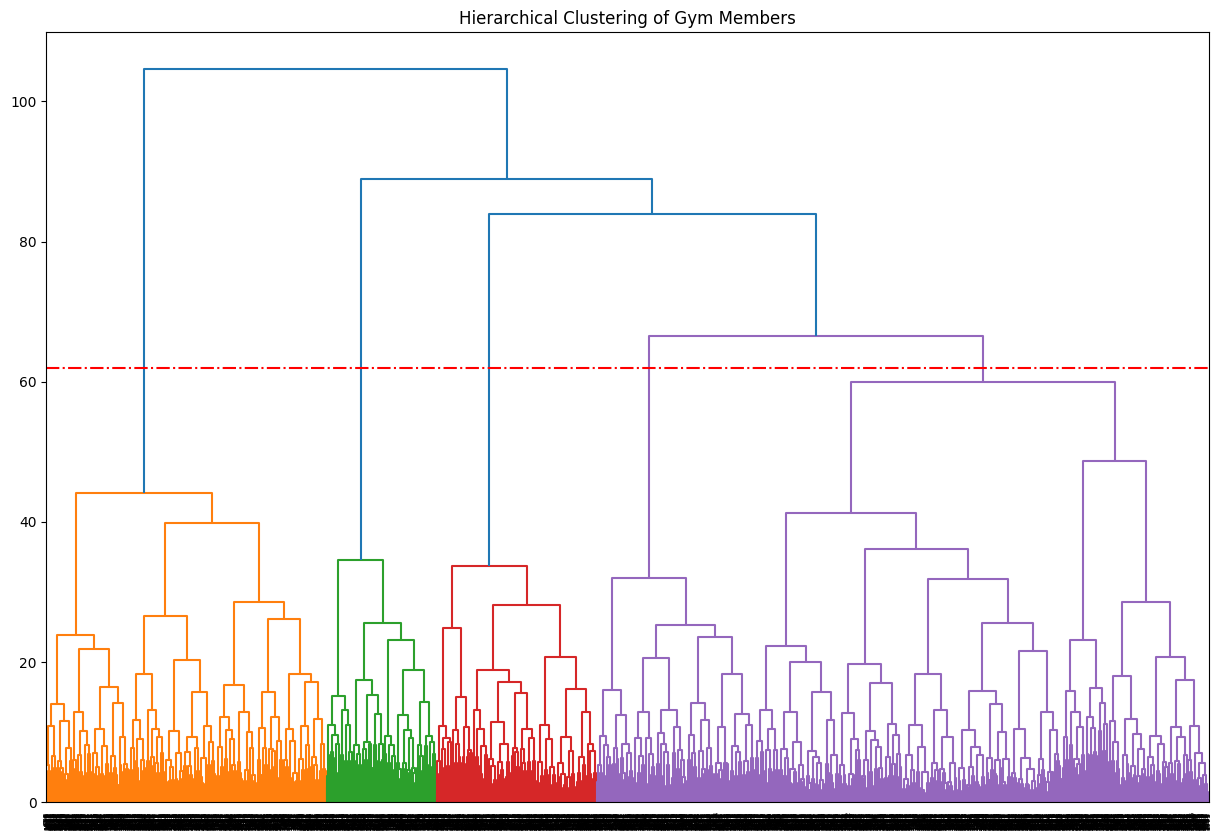

In [ ]:
# standardize features data
X_sc = scaler.fit_transform(X)

# create dendogram
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical Clustering of Gym Members')
plt.hlines(y=62, xmin=0, xmax=1000000, color='red', linestyle='dashdot')
plt.show()  

I would choose 5 clusters to make it simpler when comparing feature values between clusters.

## Mean of Every Feature and `Churn` in Each Cluster

In [ ]:
# define k_means model with 5 clusters
km = KMeans(n_clusters = 5)
# Predict clusters for observations (the algorithm assigns numbers from 0 to 4 to those observations)
labels = km.fit_predict(X_sc)
# save the cluster label in our dataset column
df['cluster_km'] = labels
# Finds the average value of every feature for all clusters
feature_mean_by_cluster = df.groupby('cluster_km').agg({
    'gender':'mean',
    'Near_Location':'mean',
    'Partner':'mean',
    'Promo_friends':'mean',
    'Phone':'mean',
    'Contract_period': 'mean',
    'Group_visits' : 'mean',
    'Age' : 'mean',
    'Avg_additional_charges_total' : 'mean',
    'Month_to_end_contract' : 'mean',
    'Lifetime' : 'mean',
    'Avg_class_frequency_total' : 'mean',
    'Avg_class_frequency_current_month' : 'mean',
    'Churn' : 'mean'
    }).T

feature_mean_by_cluster

cluster_km,0,1,2,3,4
gender,0.485179,0.595491,0.495396,0.482270,0.501071
Near_Location,0.998440,0.969496,0.000000,1.000000,0.944325
Partner,0.817473,0.267905,0.467772,0.244681,0.739829
Promo_friends,1.000000,0.100796,0.077348,0.017730,0.487152
Phone,0.900156,0.905836,0.915285,0.899823,0.901499
Contract_period,3.143526,2.884615,2.211786,1.975177,11.890792
Group_visits,0.455538,0.486737,0.215470,0.317376,0.551392
Age,29.182527,30.230769,28.473297,28.231383,29.904711
Avg_additional_charges_total,141.147858,163.105029,133.463404,131.138939,164.799347
Month_to_end_contract,2.906396,2.647215,2.075506,1.892730,10.888651


Below are the findings of each feature and cluster:
- The `Churn` average value is very small in clusters 1 and 4. This means that in both clusters very few gym members `Churn`.
- The highest average value of the `lifetime` and `Avg_additional_charges_total` feature is in clusters `1` and `4`. Both of these features may have considerable weight to `Churn`. 
- Cluster `2` is the only cluster with the average value of the `phone` feature `0`, which means in that cluster there are no gym members who provide phone numbers. In other clusters, the average value of the `phone` feature is `1`.

## Distribution of Features Based by Clusters

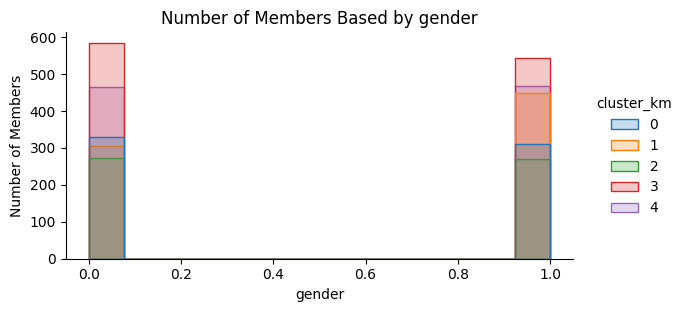

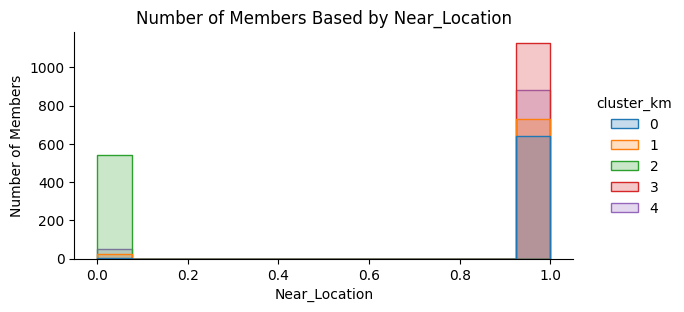

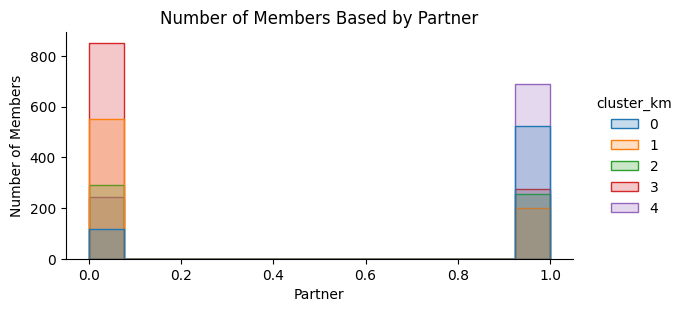

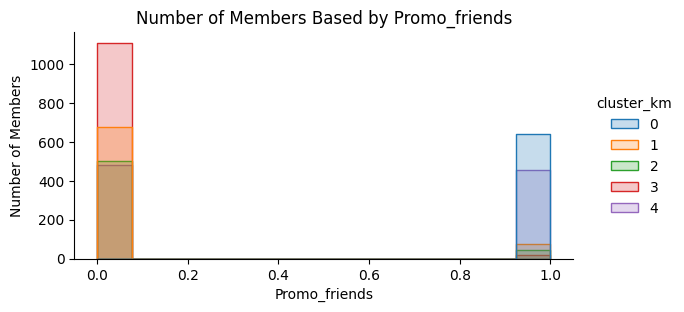

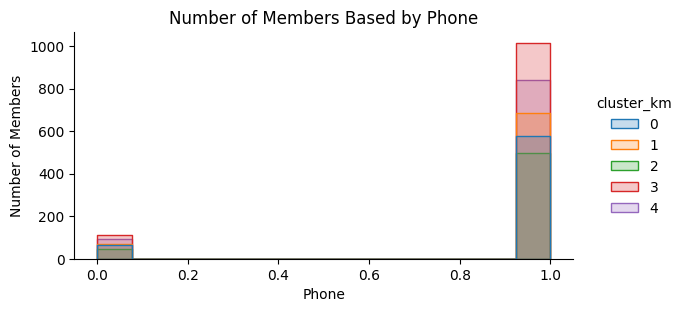

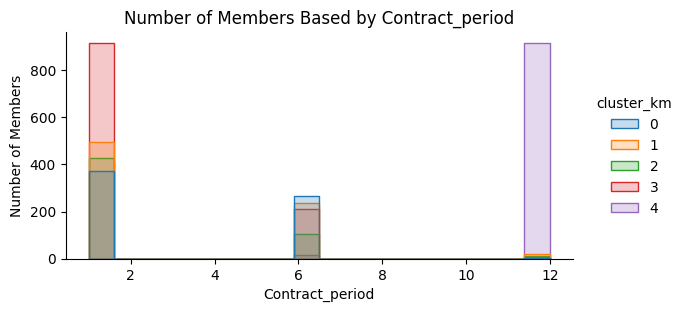

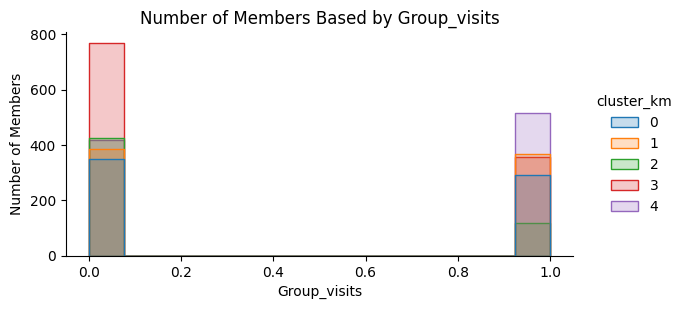

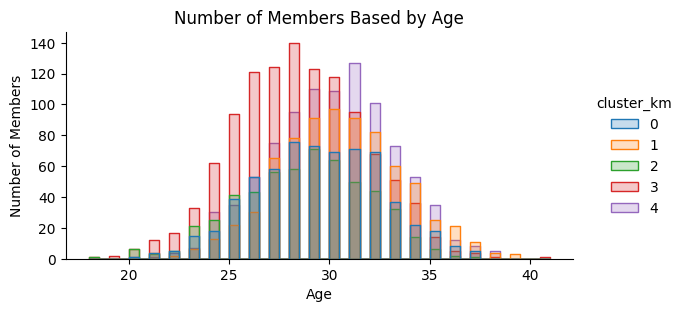

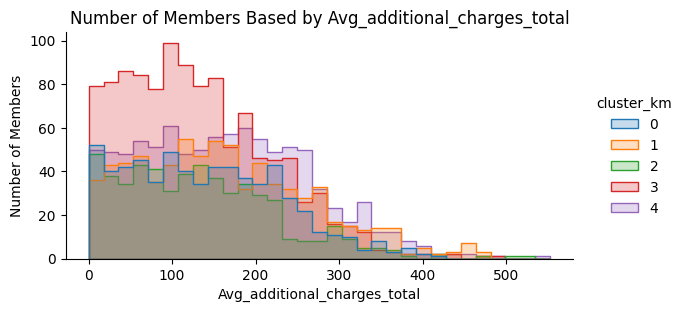

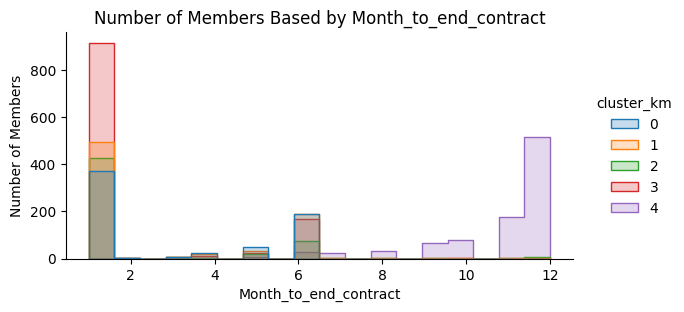

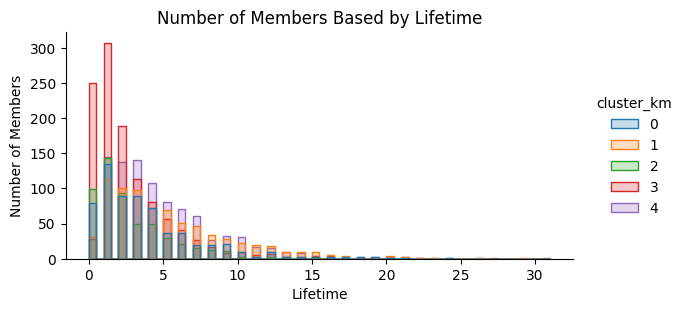

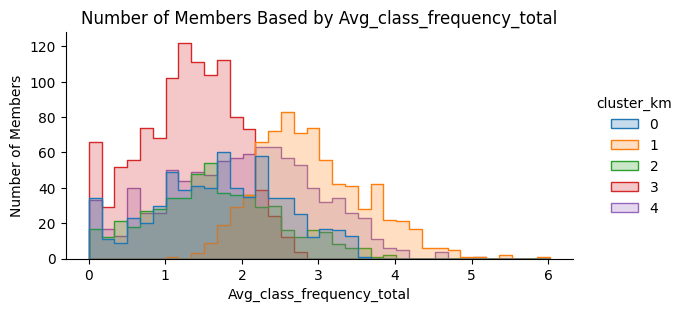

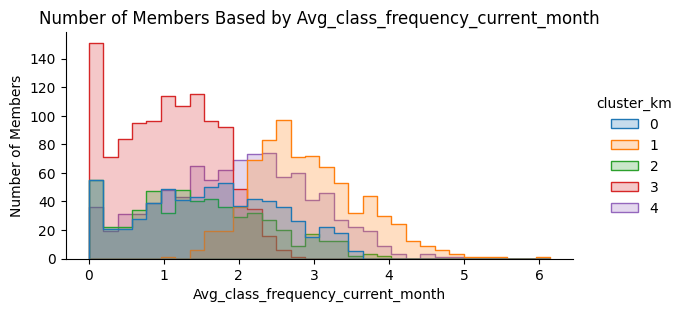

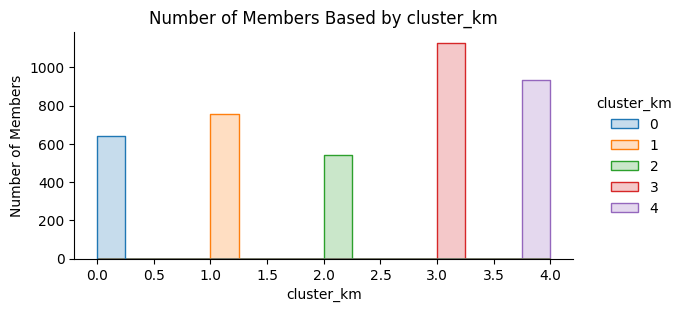

In [ ]:
df_ = df.copy()
df_.loc[df_['Churn'] == 0, 'Churn'] = 'stay'
df_.loc[df_['Churn'] == 1, 'Churn'] = 'churn'

for col in df_.columns.drop('Churn'):
  sns.displot(df_, x=col, hue='cluster_km', element='step', height=3, aspect=2, palette='tab10')
  plt.title('Number of Members Based by '+col, size=12)
  plt.xlabel(col, size=10)
  plt.ylabel('Number of Members', size=10)
  plt.show()

Below are the findings of each feature and cluster:
- cluster `3` is the cluster with the highest number of members.
- most of cluster `1` member take 1-year contract.
- Most of cluster `3` member have `lifetime` feature under 4 months.
- Most of cluster `4` member have `Avg_class_frequency_total` and `Avg_class_frequency_current_month` more than twice a week.

## `Churn` Level in Clusters

In [ ]:
df.groupby('cluster_km').agg({'Churn':'mean'})

,Churn
cluster_km,
0,0.249610
1,0.063660
2,0.451197
3,0.520390
4,0.022484


The lowest average `Churn` score is in Cluster `1`, while the highest is in Cluster `3`.

In [ ]:
df_ = df.copy()
df_.loc[df_['Churn'] == 0, 'Churn'] = 'stay'
df_.loc[df_['Churn'] == 1, 'Churn'] = 'churn'

table1 = df_.pivot_table(
    values = 'gender',
    columns = 'Churn',
    index =  'cluster_km',
    aggfunc = 'count',
    margins = True
)
table1

Churn,churn,stay,All
cluster_km,,,
0,160,481,641
1,48,706,754
2,245,298,543
3,587,541,1128
4,21,913,934
All,1061,2939,4000


Cluster `0` has the fewest members, while cluster `3` has the most.

In [ ]:
table2 = table1.div(table1.iloc[:, -1], axis=0)
table2

Churn,churn,stay,All
cluster_km,,,
0,0.249610,0.750390,1.0
1,0.063660,0.936340,1.0
2,0.451197,0.548803,1.0
3,0.520390,0.479610,1.0
4,0.022484,0.977516,1.0
All,0.265250,0.734750,1.0


based on proportion, cluster `1` has the largest proportion of members staying, with a percentage of `97%`. In contrast, cluster `3 `has the smallest proportion of members staying, with a percentage of `48%`.

Overall there are `73%` of members stay.

# Conclusions and Recommendations

In [ ]:
features_lr = pd.DataFrame(data=lr_model.coef_[0], index = X.columns).reset_index()
features_lr.columns = ['feature', 'coeff']
features_lr.sort_values(by='coeff', inplace=True)
features_lr.head()

,feature,coeff
12,Avg_class_frequency_current_month,-4.454231
10,Lifetime,-3.846281
7,Age,-1.091431
5,Contract_period,-0.719095
8,Avg_additional_charges_total,-0.552164


Based on the `logistic regression` model, `Avg_class_frequency_current_month`, `Lifetime`, and `Age` are the 3 features with the most significant weight to `Churn`. Because the value is negative, it means the relationship is reversed. So if a member is more active per week in the current month and the membership age is getting longer, the higher the probability that the gym member will stay.

Based on the histogram of frequency distribution based on `Churn`, in general, members who will stay are active 3x per week in the current month, have a membership age of more than 4 months, and are in their 30s.

That's why knowing which equipment, programs, and classes are most popular among gym members is important. The popular equipment, programs, and classes must be maintained and improved. The goal is to keep gym members active, especially new members. Because if a new member lasts at least 4 months, it increases the chances that the new member will stay in the future.